In [2]:
using LinearAlgebra, Distributions
using Plots 

In [6]:
B(n,m,β)=Bidiagonal([rand(Chi(i*β)) for i=n:-1:(n-m+1)],[rand(Chi(i*β)) for i=m-1:-1:1],:L)

B (generic function with 1 method)

## Forrester(2013) ：β-spiked Wishart ensembles
### 論文タイトル：Probability densities and distributions for spiked and general variance Wishart β-ensembles 

<img src="forrester_model.png" width=70%>

In [7]:
# example
β=1;
n=8;
m=4;
X=B(n,m,β)
X=Array(X)
X[1:1]=(√2)*X[1:1] #b=2 by Forrester
X

4×4 Array{Float64,2}:
 4.92916  0.0      0.0       0.0
 2.66599  3.09867  0.0       0.0
 0.0      1.55996  1.85983   0.0
 0.0      0.0      0.104012  1.41161

In [8]:
list=[]
size=10^6;
β=6.02;
n=30;
m=20;
b=4^3;
@time for i=1:size
    X=B(n,m,β)
    X=Array(X)
    X[1:1]=(√b)*X[1:1]
    F=maximum(svd(X).S)^2
    append!(list,F)
end
mean(list/b)

140.018837 seconds (22.47 M allocations: 24.918 GiB, 5.19% gc time)


182.4164785724182

In [9]:
using StatsPlots

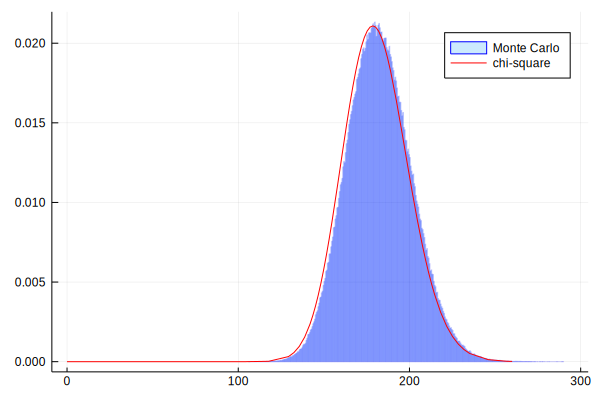

In [10]:
#size=10^6;β=6.02;n=30;m=20;b=4^3;のケース
d=Chisq(n*β)
histogram(list/b,norm=true,alpha=0.2,linecolor =:blue,lab="Monte Carlo")
plot!(d,linecolor=:red,lab="chi-square")

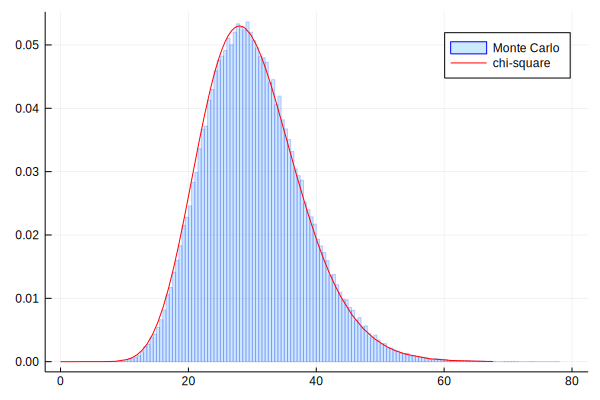

In [9]:
β=1;
d=Chisq(n*β)
histogram(list/b,norm=true,alpha=0.2,linecolor =:blue,lab="Monte Carlo")
plot!(d,linecolor=:red,lab="chi-square")

## MP則とスパイクモデル

In [16]:
n=10000;
m=300;
b1=2;
X=B(n,m,β)
X=Array(X)
X[1:1]=(√b1)*X[1:1]

1-element Array{Float64,1}:
 141.3644367526086

In [17]:
# Marchenko-Pastur則(Quater circle Law)のパラメータの設定
ρ=m/n;
σ=1;
b=σ*(sqrt(ρ)+1)^2;
a=σ*(1-sqrt(ρ))^2;

  0.028433 seconds (13 allocations: 4.157 MiB)


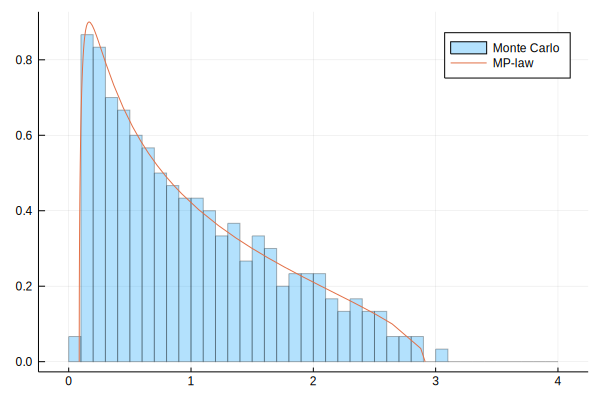

In [12]:
#スパイクモデルで検証
#n=600;m=300;b1=2;
@time list=svd(X).S
histogram(list.^2/(β*n),norm=true,alpha=0.3,bin=0:0.1:4,lab="Monte Carlo")
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b,lab="MP-law";)

In [13]:
# 飛び抜けた固有値の特定
println(string("soft edge：",b))
println(string("soft edgeを超えた固有値：",filter(x-> x>b,list.^2/(β*n))))

soft edge：2.914213562373095
soft edgeを超えた固有値：[3.0490441708428127]


  0.034010 seconds (13 allocations: 4.157 MiB)


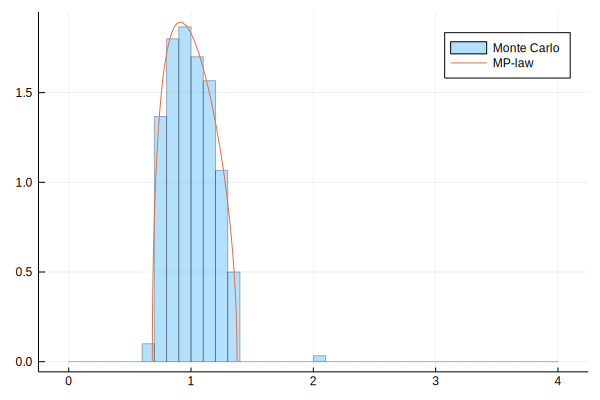

In [18]:
#スパイクモデルで検証
#n=10000;m=300;b1=2;
@time list=svd(X).S
histogram(list.^2/(β*n),norm=true,alpha=0.3,bin=0:0.1:4,lab="Monte Carlo")
plot!(x->(1/(2pi*σ*ρ*x))*sqrt((b-x)*(x-a)),a,b,lab="MP-law";)

In [19]:
println(string("soft edge：",b))
println(string("soft edgeを超えた固有値：",filter(x-> x>b,list.^2/(β*n))))

soft edge：1.3764101615137754
soft edgeを超えた固有値：[2.0520769058895936]
